# Level 12: dealing evil

[http://www.pythonchallenge.com/pc/return/evil.html](http://www.pythonchallenge.com/pc/return/evil.html)

## 線索

一張圖，圖中的人正在發牌，牌發成 5 疊

沒了，好像沒什麼其他線索

試著從圖片中讀取一些像素顏色資訊，沒什麼收穫

把圖片亮度調高來看，一樣沒什麼有用的訊息

圖片檔名是 evil1.jpg ... 是否還會有其他圖呢？來試試看

## 嘗試

先試試看抓 evil2.jpg

In [1]:
from PIL import Image
import urllib.request

baseurl = "http://www.pythonchallenge.com/pc/return/"

pwmgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
pwmgr.add_password(None, baseurl, "huge", "file")
auth_handler = urllib.request.HTTPBasicAuthHandler(pwmgr)
opener = urllib.request.build_opener(auth_handler)
urllib.request.install_opener(opener)

evil2.jpg


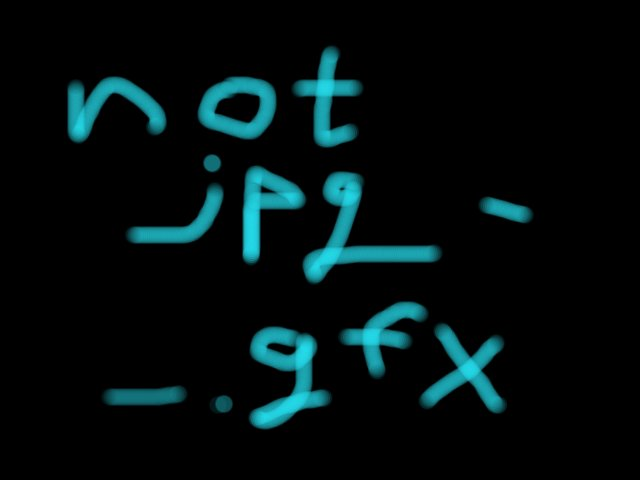

In [2]:
print('evil2.jpg')

url = "http://www.pythonchallenge.com/pc/return/evil2.jpg"

data = urllib.request.urlopen(url)
im2 = Image.open(data)
display(im2)

看起來是要我們改抓 evil2.gfx，等等再試試看，先繼續抓 evil3.jpg

evil3.jpg


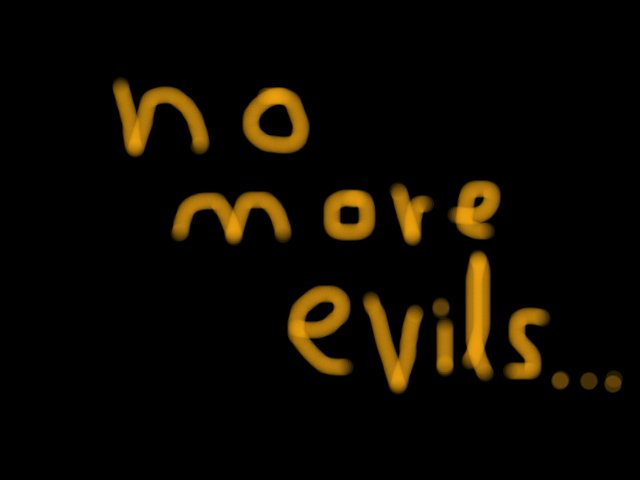

In [3]:
print('evil3.jpg')

url = "http://www.pythonchallenge.com/pc/return/evil3.jpg"

data = urllib.request.urlopen(url)
im3 = Image.open(data)
display(im3)

```no more evils...```

誰知道？XD

先繼續抓 evil4.jpg 看看

In [4]:
print('evil4.jpg')

url = "http://www.pythonchallenge.com/pc/return/evil4.jpg"

try:
    data = urllib.request.urlopen(url)
    im4 = Image.open(data)
    display(im4)
except Exception as e:
    print(e)

evil4.jpg
cannot identify image file <_io.BytesIO object at 0x10aedcfe0>


```evil4.jpg``` 看起來似乎是有 response，但格式不是圖片？

直接印出 ```data``` 看看

In [5]:
url = "http://www.pythonchallenge.com/pc/return/evil4.jpg"

data = urllib.request.urlopen(url)
print(data.read().decode())

Bert is evil! go back!



誰是 Bert?

算了先不管，繼續抓 evil5.jpg

In [6]:
print('evil5.jpg')

url = "http://www.pythonchallenge.com/pc/return/evil5.jpg"

try:
    data = urllib.request.urlopen(url)
    im5 = Image.open(data)
    display(im5)
except Exception as e:
    print(e)

evil5.jpg
HTTP Error 404: Not Found


看起來 evil5.jpg 是沒有了

那麼回頭來抓 evil2.gfx，看看裡面是什麼

In [7]:
url = "http://www.pythonchallenge.com/pc/return/evil2.gfx"

data = urllib.request.urlopen(url)
print(data.read())

b'\xff\x89G\x89\xff\xd8PIP\xd8\xffNFN\xff\xe0G8G\xe0\x00\r7\r\x00\x10\na\n\x10J\x1a@\x1aJF\n\x01\nFI\x00\xf0\x00IF\x00\x00\x00F\x00\x00\xe7\x00\x00\x01\r\x00\r\x01\x01I\x00I\x01\x01H\x00H\x01\x00D\x01D\x00\xb4R\x00R\xb4\x00\x00\x00\x00\x00\xb4\x00\x01\x00\xb4\x00\x01\x04\x01\x00\x00\x90\x02@\x00\xff\x00\x00\x00\xff\xe1\x00\x05\x00\xe1\x08\x01\x00\x00\x0b\xa4,\x02\xf0\xdfE\x08\x00\x08Ex\x02\x06\x02xi\x00\x00\x00if\x00\x00\x00f\x00\x00\x04\x00\x00\x00b\x00\xfe\x00M\xd5\x06OMMr\x00*M\x00\x95\x01<\x00*\x00\x0e\x00*\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x06\x06\t\x00\x08b\x01p\x08\x00K\x04H\x00\x00G\x00Y\x00\x00D\x00s\x00\x00\x00\x04\x00\x00\x00\x00\x07\x00\x00\x0e\x00\x05\x1b\x0e\x00\x00\x02\xaf\x00\x02\x00\x07\x00\x02\x02\x00\x00\x00\x02\x01\xf9\x05\x1b\x01\x00C\t\xaf\x00\x04\xbb\x00\x01\x04\x00\x7f\x03^\x00\x00\x00\x15\x1a\x00\x00\x00\x06\x91\x00\x01\x00\x01\x1c\x01\x00\t\x15\x00\x00\x00p\x03\x00\x00\x00H\x04\x00\x00,Y\x10\x07,\x02s\x07t\x02\x02\x00\x04I\x02\x00\x00\nM\x00\x04\x1b\

太笨了看不懂...

不過關卡的圖片中有將牌發成五堆，那我們也把 data 來切成5堆看看

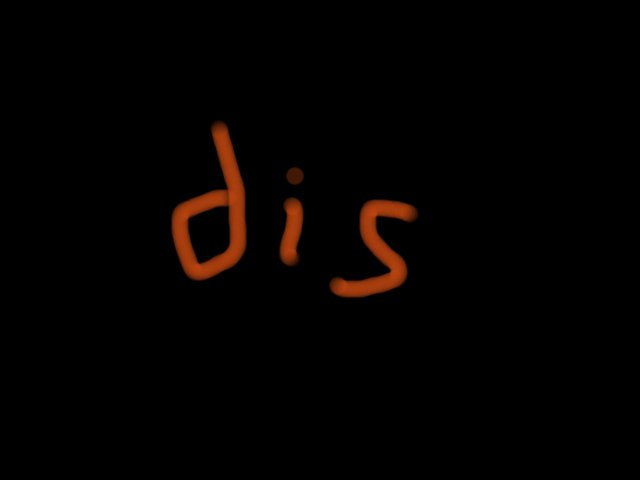

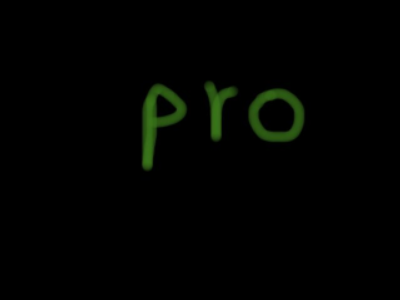

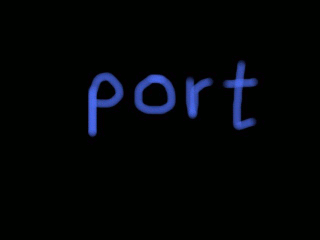

ValueError: Could not save to PNG for display

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=320x240 at 0x10AE5F3D0>

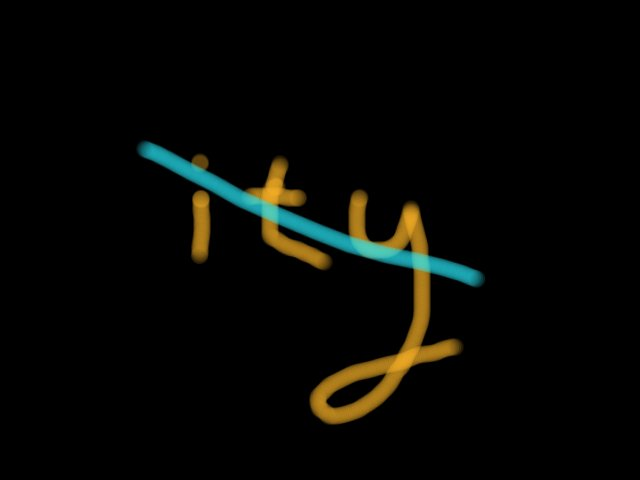

In [8]:
import io

url = "http://www.pythonchallenge.com/pc/return/evil2.gfx"
data = urllib.request.urlopen(url).read()

for i in range(5):
    im = Image.open(io.BytesIO(data[i::5]))
    display(im)

看來第四張圖片有點問題，稍微調整一下

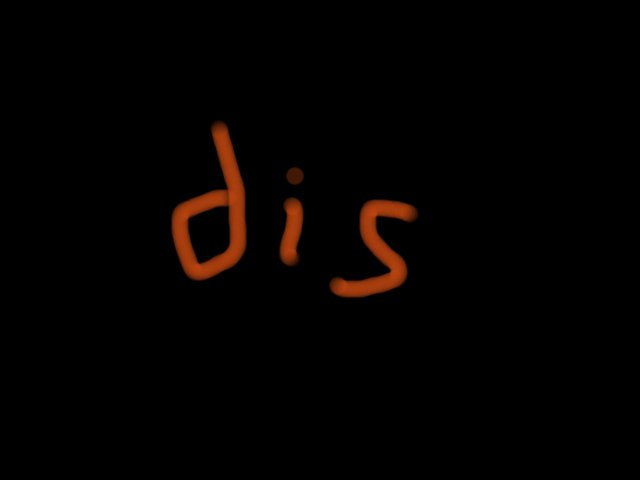

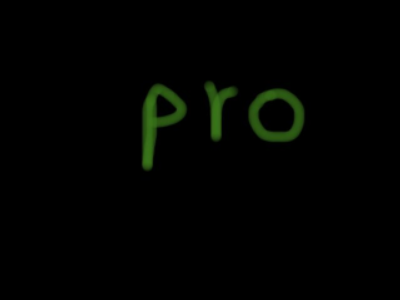

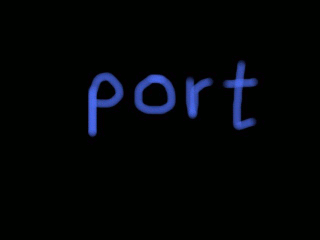

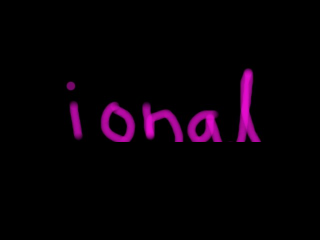

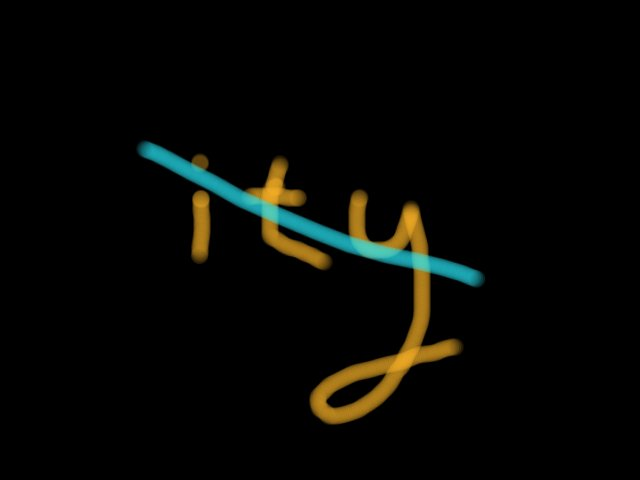

In [9]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

url = "http://www.pythonchallenge.com/pc/return/evil2.gfx"
data = urllib.request.urlopen(url).read()

for i in range(5):
    im = Image.open(io.BytesIO(data[i::5]))
    display(im)

第五張圖片被劃掉了，應該是指不需要

前四張的內容分別是 ```dis```、```pro```、```port```、```ional```，組合起來就是 ```disproportional```

那麼下一關的網址就是 ```http://www.pythonchallenge.com/pc/return/disproportional.html```